# Evaluacion

### Regresion

In [5]:
import warnings
warnings.simplefilter('ignore')

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split as tts

In [2]:
data=load_diabetes()

In [3]:
X_train, X_test, y_train, y_test=tts(data.data, data.target)

In [6]:
rf=RFR()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [9]:
# MSE
from sklearn.metrics import mean_squared_error as mse

mse(y_pred, y_test)

4382.82963963964

In [10]:
# RMSE

mse(y_pred, y_test)**0.5

66.20294283217054

In [11]:
# RMSLE

from sklearn.metrics import mean_squared_log_error as rmsle

rmsle(y_pred, y_test)

0.23260090371290484

In [12]:
# MAE

from sklearn.metrics import mean_absolute_error as mae

mae(y_pred, y_test)

55.10720720720721

In [17]:
# R2

from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.33218926788534286

In [14]:
rf.score(X_test, y_test)

0.33218926788534286

### Clasificacion

In [18]:
from sklearn.datasets import load_wine

data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

In [20]:
from sklearn.svm import SVC

svc=SVC().fit(X_train, y_train)

y_pred=svc.predict(X_test)

In [21]:
# Accuracy

from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)

0.3333333333333333

In [22]:
svc.score(X_test, y_test)

0.3333333333333333

In [24]:
# Precision

from sklearn.metrics import precision_score as prec

prec(y_test, y_pred, average='macro')

0.7674418604651163

In [27]:
# Recall

from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.3795093795093795

In [28]:
# F1_Score

from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

0.24062049062049062

In [29]:
# Matriz de Confusion

from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

array([[ 1, 10,  0],
       [ 0, 13,  0],
       [ 0, 20,  1]])

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

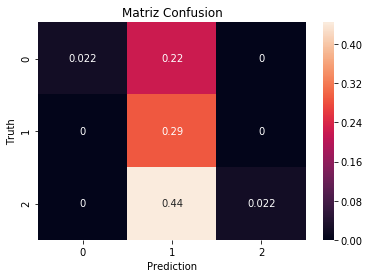

In [31]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)
b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)
plt.title('Matriz Confusion')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();

In [33]:
# ROC-AUC

from sklearn.datasets import load_breast_cancer

In [34]:
data=load_breast_cancer()
X_train, X_test, y_train, y_test=tts(data.data, data.target)

In [35]:
svc=SVC(probability=True).fit(X_train, y_train)

In [36]:
y_pred=svc.predict(X_test)
y_prob=svc.predict_proba(X_test)[::,1]

In [37]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

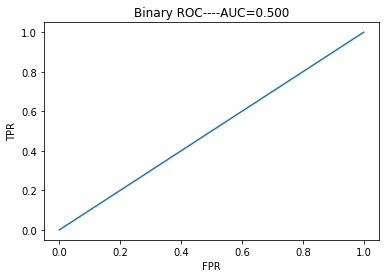

In [39]:
fpr, tpr, umbrales=roc(y_test, y_pred)
a=auc(y_test, y_pred)
plt.plot(fpr, tpr)
#plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Binary ROC----AUC={:.3f}'.format(a))
plt.show();

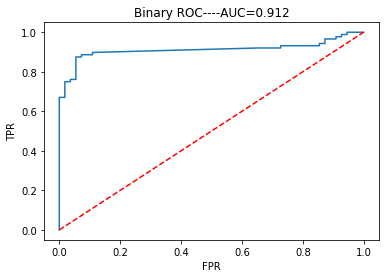

In [40]:
fpr, tpr, umbrales=roc(y_test, y_prob)
a=auc(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Binary ROC----AUC={:.3f}'.format(a))
plt.show();

# HyperOpt

In [43]:
#!pip3 install hyperopt

In [78]:
import pandas as pd
import xgboost as xgb

from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split as tts

In [79]:
df=pd.read_csv('data/diamonds_train.csv')
df=df.dropna()
df.head()

carat        cut color clarity  depth  table  price     x     y     z
0   1.21    Premium     J     VS2   62.4   58.0   4268  6.83  6.79  4.25
1   0.32  Very Good     H     VS2   63.0   57.0    505  4.35  4.38  2.75
2   0.71       Fair     G     VS1   65.5   55.0   2686  5.62  5.53  3.65
3   0.41       Good     D     SI1   63.8   56.0    738  4.68  4.72  3.00
4   1.02      Ideal     G     SI1   60.5   59.0   4882  6.55  6.51  3.95

In [80]:
X=df.drop('price', axis=1)
y=df.price

In [81]:
clarity={'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4,
         'VVS2':5, 'VVS1':6, 'IF':7}

cut={'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}

color={'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}

In [82]:
def label(s, dic):
    return dic[s]

In [83]:
X.clarity=X.clarity.apply(lambda x: label(x, clarity))
X.cut=X.cut.apply(lambda x: label(x, cut))
X.color=X.color.apply(lambda x: label(x, color))

X.head()

carat  cut  color  clarity  depth  table     x     y     z
0   1.21    3      0        3   62.4   58.0  6.83  6.79  4.25
1   0.32    2      2        3   63.0   57.0  4.35  4.38  2.75
2   0.71    0      3        4   65.5   55.0  5.62  5.53  3.65
3   0.41    1      6        2   63.8   56.0  4.68  4.72  3.00
4   1.02    4      3        2   60.5   59.0  6.55  6.51  3.95

In [84]:
X=X.drop('table', axis=1)

In [85]:
X_train, X_test, y_train, y_test=tts(X,y)

In [86]:
space={
    'n_estimators':hp.quniform('n_estimators', 10, 1000, 25),
    'learning_rate':hp.uniform('learning_rate', 0.0001, 1.0),
    'max_depth':hp.quniform('x_max_depth', 4, 16, 1),
    'min_child_weight':hp.quniform('x_min_child', 1, 10, 1),
    'subsample':hp.uniform('x_subsample', 0.7, 1),
    'gamma':hp.uniform('x_gamma', 0.1, 0.5),
    'reg_lambda':hp.uniform('x_reg_lambda', 0, 1)
}

In [87]:
def objetivo(space):
    
    modelo=xgb.XGBRegressor(
        n_estimators=int(space['n_estimators']),
        learning_rate=space['learning_rate'],
        max_depth=int(space['max_depth']),
        min_child_weight=space['min_child_weight'],
        subsample=space['subsample'],
        gamma=space['gamma'],
        reg_lambda=space['reg_lambda'],
        objective='reg:squarederror'
    )
    
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    modelo.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', verbose=False)
    
    y_pred=modelo.predict(X_test)
    
    rmse=mse(y_test, y_pred)**0.5
    
    return {'loss':rmse, 'status':STATUS_OK}

In [88]:
trials_reg=Trials()

In [89]:
best=fmin(fn=objetivo, space=space, algo=tpe.suggest, max_evals=10, trials=Trials())

best

100%|██████████| 10/10 [03:02<00:00, 18.23s/it, best loss: 546.4647481904739]


{'learning_rate': 0.0391194014067339,
 'n_estimators': 575.0,
 'x_gamma': 0.4221673135522599,
 'x_max_depth': 9.0,
 'x_min_child': 5.0,
 'x_reg_lambda': 0.7038802057828555,
 'x_subsample': 0.9356432110100066}

In [91]:
modelo=xgb.XGBRegressor(
    n_estimators=int(best['n_estimators']),
    learning_rate=best['learning_rate'],
    x_max_depth=int(best['x_max_depth']),
    x_min_child=best['x_min_child'],
    x_subsample=best['x_subsample'],
    x_gamma=best['x_gamma'],
    x_reg_lambda=best['x_reg_lambda'],
    objective='reg:squarederror'
    )

In [92]:
modelo.fit(X_train, y_train)
y_pred=modelo.predict(X_test)
mse(y_test, y_pred)**0.5

596.7552152231191

In [93]:
m=xgb.XGBRegressor()
m.fit(X_train, y_train)
y_pred=m.predict(X_test)
mse(y_test, y_pred)**0.5

[11:17:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


632.2959096319559